# Logistic Regression 

Dataset Source(Breast Cancer Dataset): https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

In [ ]:
# Loading the dataset
cancer = load_breast_cancer()
y = cancer.target
X = cancer.data

In [ ]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

#### Scale the data since we will be using gradient ascent

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_test)

(426, 30)
(426,)
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]


In [ ]:
# Appending a column of ones to x_train 

ones = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))

X_train = np.hstack((ones, X_train))

ones = np.ones(X_test.shape[0]).reshape((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))


print("The training data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
print(X_train[0:2])

The training data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


In [ ]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# You can add your own code here to better understand the dataset


# Fitting the model
## Logistic Regression Using Gradient Ascent

In [ ]:
def sigmoid(z):
    ## TODO
    res = np.zeros((z.shape))
    for i in range(0,z.shape[0]):
      num = 1/(1+math.exp(-z[i][0]))
      res[i][0] = num
    return res
    
    ## 
print(sigmoid(np.array([[8.8],[9.0],[12.7],[9.7]])))

[[0.99984929]
 [0.99987661]
 [0.99999695]
 [0.99993872]]


In [ ]:
#Testing Sigmoid
import math
ans = math.log(0.99984929)+math.log(0.99987661)+math.log(1-0.99999695)+math.log(1-0.99993872)
print(ans)
print(sigmoid(np.array([[0]])))

-22.40070011884565
[[0.5]]


In [ ]:
# Initialize parameters w
rng = np.random.default_rng(seed=42)
w = rng.random((X_train.shape[1], 1))/10
print(w.shape)

(31, 1)


In [ ]:
def hypothesis(X , w):
    #TODO
    pdt = np.dot(X,w)
    res = sigmoid(pdt) 
    return res
    ##

In [ ]:
yhat = hypothesis(X_train, w)
print(yhat.shape) # should return (426, 1)
print(y_train.shape) # should return (426,)

(426, 1)
(426,)


In [ ]:
def log_likelihood(X , y , w ):
    N = X.shape[0]
    ans = 0
    yhat = hypothesis(X, w)
    for i in range(0,N):
      ans += y[i]*np.log(yhat[i][0]) + (1-y[i])*np.log(1-yhat[i][0])
    
    ##
    return ans

In [ ]:
print(y_train.shape)
print(log_likelihood(X_train,y_train,w))

(426,)
-496.06217331717187


# Gradient Ascent


In [ ]:
def eval(X,y,yhat,j):
  res = 0
  for i in range(0,y.shape[0]):
    res+=(y[i]-yhat[i][0])*X[i][j]
  return res

In [ ]:
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    log_likelihood_values = []  
    rng = np.random.default_rng(seed=42)
    w = rng.random((X_train.shape[1],1))/10
    N = X.shape[0] 
    
    for i in range(0,num_iters):
      yhat = hypothesis(X, w)
      for j in range(0,X.shape[1]):
        
        w[j] = w[j] + eval(X,y,yhat,j)*learning_rate/N
    
      if (i % 100) == 0:
        log_likelihood_values.append(log_likelihood(X,y,w))
        
    return w, log_likelihood_values

### After completing the code above, run the following

In [ ]:
learning_rate = 0.5
num_iters = 5000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
print(w)
# print(log_likelihood_values)

[[-0.10479362]
 [-0.03876021]
 [-0.05931612]
 [ 0.19066917]
 [-0.34539014]
 [-0.44745888]
 [ 2.75083031]
 [-1.27350697]
 [-3.06118235]
 [ 1.16882442]
 [-0.85836464]
 [-3.71949066]
 [ 0.72063014]
 [-0.81754043]
 [-2.4839662 ]
 [-0.40500676]
 [ 0.53382685]
 [ 0.02137751]
 [-1.26320739]
 [ 1.31331007]
 [ 2.09619967]
 [-1.66686363]
 [-2.83819903]
 [-0.17185777]
 [-1.75059055]
 [-0.16434872]
 [ 0.73167858]
 [-2.46764169]
 [-1.32369088]
 [-3.00233008]
 [-0.37376298]]


In [ ]:
print(np.array(log_likelihood_values).shape)
print(y_test)

(50,)
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]


# Plotting Likelihood v/s Number of Iterations.

(50,)


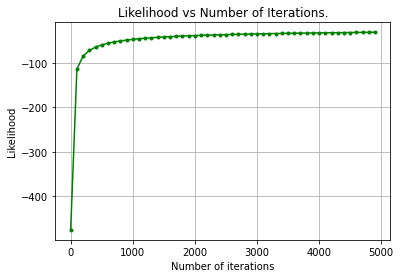

In [ ]:
iters = np.array(range(0,num_iters,100))
print(iters.shape)
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

In [ ]:
hx = hypothesis(X_test, w)
print(y_test)
hx[hx>0.5] = 1
hx[hx<=0.5] = 0
tn, fp, fn, tp = confusion_matrix(y_test,hx).ravel()
print(confusion_matrix(y_test,hx).ravel())
tpr = tp/(tp+fn)
print(tpr)

fpr = fp/(tn+fp)
print(fpr)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
[53  1  3 86]
0.9662921348314607
0.018518518518518517
